In [1]:
from pathlib import Path
import os
import openmm
import openmm.app as openmm_app
import pandas as pd
from tools import base, simulator
from tools.simulator import MSDReporter
from tqdm import tqdm as _tqdm

In [4]:
for path in os.listdir('systems'):
    sim_path = Path(f'systems/{path}')
    substance, x, rho = path.split('_')
    result_dir = Path(f'results/{sim_path.stem}')
    result_dir.mkdir(parents=True, exist_ok=True)

    print('#' * 30, f'{substance:10}: {int(x):<3}')
    for T in [15, 20, 25, 30, 40]:
        print('#' * 20,'Tempetature: ',T)
        sim = simulator.Simulation(T=T)
        sim.load(sim_path)
        sim.equilibrate(2)
        sim.simulate(10)
        df:pd.DataFrame = sim.get_data()
        df.to_csv(f'{result_dir}/{T}.csv')


############################## peta      : 41 


Equilibration:   0%|          | 0/2 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [26]:
df = pd.DataFrame( sim.msdReporter.data)
df

,Time,DMA,BUT
0,1.000000e-12,6.971924e-17,7.171479e-17
1,2.000000e-12,7.761958e-17,8.297701e-17
2,3.000000e-12,9.790476e-17,1.359052e-16
3,4.000000e-12,9.603614e-17,1.400009e-16
4,5.000000e-12,9.673788e-17,1.089169e-16
...,...,...,...
105,1.060000e-10,3.895205e-16,4.382409e-16
106,1.070000e-10,3.830032e-16,5.123756e-16
107,1.080000e-10,4.015923e-16,6.180299e-16
108,1.090000e-10,3.942171e-16,5.651130e-16


In [15]:
import matplotlib.pyplot as plt

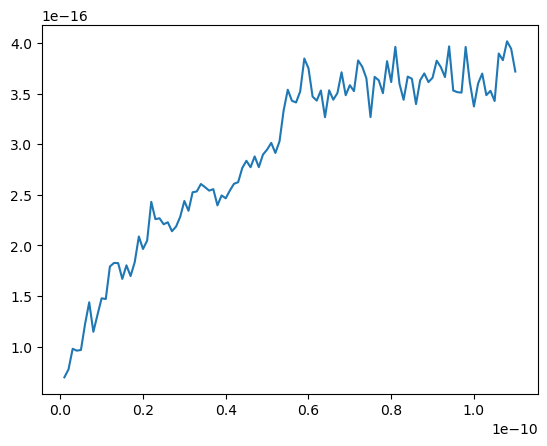

In [27]:
plt.plot(df['Time'],df['DMA'])